In [ ]:
# Code by Kelvin Huynh

# Prompt:
#   Find people who have given high ratings to horror movies. How much do they like the other genres? 
#   If you had to select another genre to recommend, what would it be and why?

# Dataset:
# csvs used in code from https://grouplens.org/datasets/movielens/

In [2]:
# import modules
import re, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# read csv files from desktop to variables to use
ratings = pd.read_csv('C:/Users/kh123/Python Stuff/INST414/ratings.csv', index_col=None)
movies = pd.read_csv('C:/Users/kh123/Python Stuff/INST414/movies.csv', index_col=None)

In [91]:
# make copies of the original datasets to avoid any manipulation
movies_copy = movies.copy()
display(movies_copy.head())

ratings_copy = ratings.copy()
display(ratings_copy.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [92]:
# subset dataframe from movies dataset so that only rows that contain horror genre remain
horror_movies = movies_copy[movies_copy['genres'].str.contains('Horror')]

In [93]:
# print out table to check
horror_movies

,movieId,title,genres
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
62,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
81,92,Mary Reilly (1996),Drama|Horror|Thriller
82,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance
125,152,"Addiction, The (1995)",Drama|Horror
149,177,Lord of Illusions (1995),Horror
154,183,Mute Witness (1994),Comedy|Horror|Thriller
159,188,"Prophecy, The (1995)",Fantasy|Horror|Mystery
166,196,Species (1995),Horror|Sci-Fi


In [94]:
# subset the ratings dataframe such that only rows contain both a movieId within the horror_movies id column and a rating >= 4
filtered_ratings = ratings_copy[(ratings_copy['movieId'].isin(horror_movies['movieId'])) & (ratings_copy['rating'] >= 4)]

In [95]:
# print out the filtered ratings dataframe
filtered_ratings

,userId,movieId,rating,timestamp
34,1,593,4.0,964983793
75,1,1214,4.0,964981855
91,1,1348,4.0,964983393
150,1,2366,4.0,964982462
158,1,2459,5.0,964983414
174,1,2644,4.0,964983393
175,1,2648,4.0,964983414
176,1,2654,5.0,964983393
209,1,3273,5.0,964983536
280,3,2288,4.0,1306463631


In [96]:
# drop unneeded columns from dataframe
filtered_ratings = filtered_ratings.drop('movieId', 1)
filtered_ratings = filtered_ratings.drop('rating', 1)
filtered_ratings = filtered_ratings.drop('timestamp', 1)
filtered_ratings

,userId
34,1
75,1
91,1
150,1
158,1
174,1
175,1
176,1
209,1
280,3


In [97]:
# get a dataset of all the unique userId that watch horror movies and get the movies a rating of 4 or greater
unique_horror_users_good_rating = filtered_ratings.drop_duplicates()
unique_horror_users_good_rating

,userId
34,1
280,3
339,4
575,6
888,7
1046,8
1287,11
1360,13
1431,14
1456,15


In [98]:
# thinking out loud:

# scatter plot: x axis is the different genres, y being the average rating for each type of movie genre
# each point on the graph with be the individual unique users' average rating of the genre

# dataframe to look like:

# userId - genre - rating
# userId can have multiple of the same values (e.g. userId 1) because they will have a rating for every genre

In [99]:
# subset ratings dataframe for only users that had good ratings for horror movies
all_movies_for_good_horror_users = ratings_copy[ratings_copy['userId'].isin(unique_horror_users_good_rating['userId'])]
all_movies_for_good_horror_users

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [100]:
# create a column for unique genres
genres = movies_copy['genres'].str.split('|').str[-1]
genres = genres.drop_duplicates()
genres = genres.to_frame()
genres = genres.reset_index(drop=True)
genres

,genres
0,Fantasy
1,Romance
2,Comedy
3,Thriller
4,Children
5,Action
6,Horror
7,Drama
8,Sci-Fi
9,War


In [168]:
# create new dataframe for eventually graphing of data
new_df = pd.DataFrame(columns = ['UserId', 'Genre', 'Rating'])
new_df

,UserId,Genre,Rating


In [169]:
# algorithm:

# loop through every row in all_movies_for_good_horror_users:
#    loop through every genre in genres dataset:
#            if all_movies_for_good_horror_users movieId contains the current genre, add to new dataframe:
#                             current userId, genre of movie, and rating
for index, curr_movie_row in all_movies_for_good_horror_users.iterrows():
    for index, curr_genres_row in genres.iterrows():
        if curr_genres_row.genres in movies_copy[movies_copy['movieId'] == int(float(curr_movie_row.movieId))].genres.to_string(): 
            new_df = new_df.append({'UserId': curr_movie_row.userId,'Genre': curr_genres_row.genres, 'Rating': curr_movie_row.rating}, ignore_index = True)                

In [145]:
# create new table that groups by userId and genre and get the average rating for each genre for each user
grouped_new_df = new_df.groupby(['UserId', 'Genre'])['Rating'].mean()

In [146]:
# print out to see results
grouped_new_df

UserId  Genre      
1.0     Action         4.322222
        Adventure      4.388235
        Animation      4.689655
        Children       4.547619
        Comedy         4.277108
        Crime          4.355556
        Drama          4.529412
        Fantasy        4.282609
        Film-Noir      5.000000
        Horror         3.470588
        Musical        4.681818
        Mystery        4.117647
        Romance        4.307692
        Sci-Fi         4.256410
        Thriller       4.166667
        War            4.500000
        Western        4.285714
3.0     Action         3.571429
        Adventure      2.727273
        Animation      0.500000
        Children       0.500000
        Comedy         1.000000
        Crime          0.500000
        Drama          0.750000
        Fantasy        3.375000
        Horror         4.687500
        Musical        0.500000
        Mystery        5.000000
        Romance        0.500000
        Sci-Fi         4.200000
                    

In [148]:
# convert series variable to dataframe (to utilize columns)
grouped_new_df = grouped_new_df.to_frame()

In [162]:
# reset the index as it messed up the columns // The visual below is the whole dataset; wasn't fully processed
grouped_new_df = grouped_new_df.reset_index()
grouped_new_df

,UserId,Genre,Rating
0,1.0,Action,4.322222
1,1.0,Adventure,4.388235
2,1.0,Animation,4.689655
3,1.0,Children,4.547619
4,1.0,Comedy,4.277108
5,1.0,Crime,4.355556
6,1.0,Drama,4.529412
7,1.0,Fantasy,4.282609
8,1.0,Film-Noir,5.000000
9,1.0,Horror,3.470588


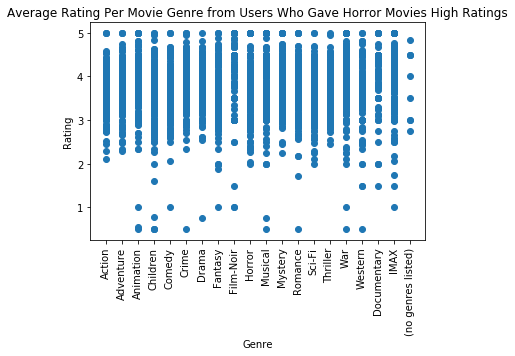

In [167]:
# plot the scatter plot
plt.scatter(grouped_new_df['Genre'], grouped_new_df['Rating'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Average Rating Per Movie Genre from Users Who Gave Horror Movies High Ratings')
plt.show()

In [ ]:
# analysis of scatter plot:

#   Every horror movie that had a good rating (4 or higher) had its userId placed within a new dataframe
#   The new dataframe had all these unique userId's and all of their movies
#   Each unique user has a dot on the graph, one for each genre, representing the average rating for that genre
#   Recommended genres for horror lovers: adventure, mystery, sci-fi, thriller